# Taller 1
## Jorge Andrés Silva 2160411
## José Pablo Sosa Saavedra - 2241670


## Sección 1.1.6 problema 3:


Los vértices de un triángulo $ABC$ tienen como vectores posición $\mathbf{a}$, $\mathbf{b}$ y $\mathbf{c}$, respectivamente, y relativos a un origen común $O$. Demuestre que el vector posición $\mathbf{g}$ del centroide $G$ del triángulo viene dado por

$
\mathbf{g} = \frac{1}{3} (\mathbf{a} + \mathbf{b} + \mathbf{c})
$

## Desarrollo

El centroide $G$ es la intersección de las medianas del triángulo.  
Si $M_{BC} = \frac{\mathbf{b} + \mathbf{c}}{2}$ es el punto medio de $BC$, la mediana desde $A$ es el segmento que une $A$ con $M_{BC}$.  

Pasos:
1. Definir $\mathbf{a},\mathbf{b},\mathbf{c} \in \mathbb{R}^3$ de forma simbólica.
2. Calcular los puntos medios $M_{BC}$ y $M_{AC}$.
3. Parametrizar dos medianas y resolver su intersección.
4. Mostrar que la solución $\mathbf{G}$ satisface  
   $
   \mathbf{g} = \frac{1}{3} (\mathbf{a} + \mathbf{b} + \mathbf{c})
   $
   y que $t = \frac{2}{3}$.


In [1]:
import sympy as sp
sp.init_printing()

# Definición de coordenadas simbólicas
ax, ay, az = sp.symbols('ax ay az', real=True)
bx, by, bz = sp.symbols('bx by bz', real=True)
cx, cy, cz = sp.symbols('cx cy cz', real=True)

# Vectores posición
a = sp.Matrix([ax, ay, az])
b = sp.Matrix([bx, by, bz])
c = sp.Matrix([cx, cy, cz])

# Puntos medios
M_BC = (b + c) / 2
M_AC = (a + c) / 2

# Parámetros para medianas
t, s = sp.symbols('t s', real=True)

# Mediana desde A y desde B
L1 = a + t * (M_BC - a)
L2 = b + s * (M_AC - b)

# Resolver intersección
sol = sp.solve(list(L1 - L2), (t, s), dict=True)
sol



Se toma la solución obtenida y se sustituye en una de las parametrizaciones para obtener $G$.


In [2]:
t_val = sp.simplify(sol[0][t])
G = sp.simplify(L1.subs(t, t_val))

# Expresión esperada
G_expected = sp.simplify((a + b + c) / 3)

# Verificación
eq_g = sp.simplify(G - G_expected)
t_val, G, G_expected, eq_g


⎛     ⎡ax   bx   cx⎤  ⎡ax   bx   cx⎤     ⎞
⎜     ⎢── + ── + ──⎥  ⎢── + ── + ──⎥     ⎟
⎜     ⎢3    3    3 ⎥  ⎢3    3    3 ⎥     ⎟
⎜     ⎢            ⎥  ⎢            ⎥  ⎡0⎤⎟
⎜     ⎢ay   by   cy⎥  ⎢ay   by   cy⎥  ⎢ ⎥⎟
⎜2/3, ⎢── + ── + ──⎥, ⎢── + ── + ──⎥, ⎢0⎥⎟
⎜     ⎢3    3    3 ⎥  ⎢3    3    3 ⎥  ⎢ ⎥⎟
⎜     ⎢            ⎥  ⎢            ⎥  ⎣0⎦⎟
⎜     ⎢az   bz   cz⎥  ⎢az   bz   cz⎥     ⎟
⎜     ⎢── + ── + ──⎥  ⎢── + ── + ──⎥     ⎟
⎝     ⎣3    3    3 ⎦  ⎣3    3    3 ⎦     ⎠


El resultado obtenido confirma que

$
\mathbf{g} = \frac{1}{3} (\mathbf{a} + \mathbf{b} + \mathbf{c})
$

y que $t = \frac{2}{3}$, lo que significa que $G$ divide cada mediana en razón $2:1$ desde el vértice.


In [3]:
# Comprobación numérica
import random
random.seed(7)

a_num = sp.Matrix([random.randint(-5, 5) for _ in range(3)])
b_num = sp.Matrix([random.randint(-5, 5) for _ in range(3)])
c_num = sp.Matrix([random.randint(-5, 5) for _ in range(3)])

M_BC_num = (b_num + c_num) / 2
t_num = sp.Rational(2, 3)

G_formula = (a_num + b_num + c_num) / 3
G_median = a_num + t_num * (M_BC_num - a_num)

a_num, b_num, c_num, G_formula, G_median, sp.simplify(G_formula - G_median)


⎛⎡0 ⎤  ⎡5 ⎤  ⎡3 ⎤  ⎡8/3⎤  ⎡8/3⎤  ⎡0⎤⎞
⎜⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢   ⎥  ⎢   ⎥  ⎢ ⎥⎟
⎜⎢-3⎥, ⎢-5⎥, ⎢-4⎥, ⎢-4 ⎥, ⎢-4 ⎥, ⎢0⎥⎟
⎜⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢   ⎥  ⎢   ⎥  ⎢ ⎥⎟
⎝⎣1 ⎦  ⎣-4⎦  ⎣0 ⎦  ⎣-1 ⎦  ⎣-1 ⎦  ⎣0⎦⎠

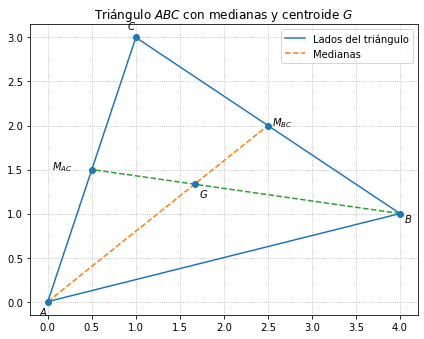

In [4]:
# --- Triángulo ABC, medianas y centroide G (ejemplo reproducible) ---
import matplotlib.pyplot as plt

# Se definen coordenadas de ejemplo para los vértices
A = (0.0, 0.0)
B = (4.0, 1.0)
C = (1.0, 3.0)

# Se calculan puntos medios necesarios para las medianas
M_BC = ((B[0] + C[0]) / 2.0, (B[1] + C[1]) / 2.0)  # Punto medio de BC
M_AC = ((A[0] + C[0]) / 2.0, (A[1] + C[1]) / 2.0)  # Punto medio de AC

# Se calcula el centroide por la fórmula g = (a + b + c)/3
G = ((A[0] + B[0] + C[0]) / 3.0, (A[1] + B[1] + C[1]) / 3.0)

# --- Gráfica ---
plt.figure(figsize=(6, 6))

# Lados del triángulo
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], '-', label="Lados del triángulo")

# Medianas (A->M_BC y B->M_AC)
plt.plot([A[0], M_BC[0]], [A[1], M_BC[1]], '--', label="Medianas")
plt.plot([B[0], M_AC[0]], [B[1], M_AC[1]], '--')

# Puntos
plt.scatter([A[0], B[0], C[0], M_BC[0], M_AC[0], G[0]],
            [A[1], B[1], C[1], M_BC[1], M_AC[1], G[1]], zorder=5)

# Etiquetas de puntos
plt.text(A[0]-0.1, A[1]-0.15, r"$A$")
plt.text(B[0]+0.05, B[1]-0.1, r"$B$")
plt.text(C[0]-0.1, C[1]+0.1, r"$C$")
plt.text(M_BC[0]+0.05, M_BC[1], r"$M_{BC}$")
plt.text(M_AC[0]-0.45, M_AC[1], r"$M_{AC}$")
plt.text(G[0]+0.05, G[1]-0.15, r"$G$")

# Ajustes de la figura
plt.gca().set_aspect('equal', adjustable='box')
plt.title(r"Triángulo $ABC$ con medianas y centroide $G$")
plt.grid(True, linestyle=':', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()


En la figura se representa un triángulo $ABC$ definido por tres vértices con coordenadas de ejemplo.  
Se han trazado dos de sus **medianas**:  
- La mediana desde $A$ hacia el punto medio $M_{BC}$ del lado $BC$.  
- La mediana desde $B$ hacia el punto medio $M_{AC}$ del lado $AC$.  

El **centroide** $G$ se calculó como el promedio de los vectores posición de los vértices:

$
\mathbf{g} = \frac{1}{3} (\mathbf{a} + \mathbf{b} + \mathbf{c})
$

Este punto $G$ divide cada mediana en la razón $2:1$, contada desde el vértice, y constituye la intersección de todas las medianas del triángulo.


## Sección 1.2.7 problema 6

Considere los siguientes vectores:

$
\mathbf{a} = \hat{e}_1 + 2\hat{e}_2 + 3\hat{e}_3, 
\quad
\mathbf{b} = 4\hat{e}_1 + 5\hat{e}_2 + 6\hat{e}_3, 
\quad
\mathbf{c} = 3\hat{e}_1 + 2\hat{e}_2 + \hat{e}_3, 
\quad
\mathbf{d} = 6\hat{e}_1 + 5\hat{e}_2 + 4\hat{e}_3.
$

Encuentre:

(a) Las siguientes sumas:  
$
\mathbf{a} + \mathbf{b} + \mathbf{c} + \mathbf{d}, 
\quad 
\mathbf{a} + \mathbf{b} - \mathbf{c} - \mathbf{d}, 
\quad 
\mathbf{a} - \mathbf{b} + \mathbf{c} - \mathbf{d}, 
\quad 
-\mathbf{a} + \mathbf{b} - \mathbf{c} + \mathbf{d}.
$

(b) El ángulo entre los vectores $\mathbf{a}$, $\mathbf{b}$, $\mathbf{c}$, $\mathbf{d}$ y los vectores base $\hat{e}_1, \hat{e}_2, \hat{e}_3$.

(c) La magnitud de los vectores $\mathbf{a}$, $\mathbf{b}$, $\mathbf{c}$, $\mathbf{d}$.

(d) El ángulo entre $\mathbf{a}$ y $\mathbf{b}$ y entre $\mathbf{c}$ y $\mathbf{d}$.

(e) La proyección de $\mathbf{a}$ sobre $\mathbf{b}$.

(f) Si los vectores $\mathbf{a}$, $\mathbf{b}$, $\mathbf{c}$, $\mathbf{d}$ son coplanarios.

(g) Encuentre $(\mathbf{a} + \mathbf{b}) \cdot (\mathbf{c} + \mathbf{d})$.

(h) Los productos $\mathbf{a} \times \mathbf{b}$, $\mathbf{b} \times \mathbf{c}$, $\mathbf{c} \times \mathbf{d}$ y los ángulos que estos forman con $\mathbf{d}$.

(i) $\mathbf{c} \cdot (\mathbf{a} \times \mathbf{b})$.
## Desarrollo

In [2]:
import sympy as sp
sp.init_printing()

# Se definen vectores en la base canónica de R^3
a = sp.Matrix([1, 2, 3])
b = sp.Matrix([4, 5, 6])
c = sp.Matrix([3, 2, 1])
d = sp.Matrix([6, 5, 4])

e1 = sp.Matrix([1,0,0])
e2 = sp.Matrix([0,1,0])
e3 = sp.Matrix([0,0,1])

# Funciones auxiliares
def norma(v):      # Se calcula la norma euclídea
    return sp.sqrt(v.dot(v))

def angulo(u,v):   # Se calcula el ángulo (en radianes) entre u y v
    return sp.acos(sp.simplify(u.dot(v) / (norma(u)*norma(v))))

def proy_u_sobre_v(u, v):  # Proyección de u sobre v
    return (u.dot(v) / v.dot(v)) * v


### (a) Sumas pedidas

Se calculan las combinaciones lineales:

$
\mathbf{a}+\mathbf{b}+\mathbf{c}+\mathbf{d}, \quad
\mathbf{a}+\mathbf{b}-\mathbf{c}-\mathbf{d}, \quad
\mathbf{a}-\mathbf{b}+\mathbf{c}-\mathbf{d}, \quad
-\mathbf{a}+\mathbf{b}-\mathbf{c}+\mathbf{d}.
$


In [6]:
S1 = a + b + c + d
S2 = a + b - c - d
S3 = a - b + c - d
S4 = -a + b - c + d

S1, S2, S3, S4


⎛⎡14⎤  ⎡-4⎤  ⎡-6⎤  ⎡6⎤⎞
⎜⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢ ⎥⎟
⎜⎢14⎥, ⎢0 ⎥, ⎢-6⎥, ⎢6⎥⎟
⎜⎢  ⎥  ⎢  ⎥  ⎢  ⎥  ⎢ ⎥⎟
⎝⎣14⎦  ⎣4 ⎦  ⎣-6⎦  ⎣6⎦⎠


### (b) Ángulo entre $\mathbf{a},\mathbf{b},\mathbf{c},\mathbf{d}$ y los vectores base $\hat e_1,\hat e_2,\hat e_3$

Para cada par $(\mathbf{v},\hat e_i)$ se usa

$
\theta(\mathbf{v},\hat e_i)=\arccos\!\left(\dfrac{\mathbf{v}\cdot\hat e_i}{\|\mathbf{v}\|\,\|\hat e_i\|}\right)
= \arccos\!\left(\dfrac{v_i}{\|\mathbf{v}\|}\right).
$

Se reportan radianes y grados.


In [7]:
vectores = {'a':a, 'b':b, 'c':c, 'd':d}
bases = {'e1':e1, 'e2':e2, 'e3':e3}

ang_rad = {}
ang_deg = {}

for name_v, v in vectores.items():
    ang_rad[name_v] = {}
    ang_deg[name_v] = {}
    for name_e, e in bases.items():
        th = sp.simplify(angulo(v,e))
        ang_rad[name_v][name_e] = th
        ang_deg[name_v][name_e] = sp.N(sp.deg(th))

ang_rad, ang_deg


({'a': {'e1': acos(sqrt(14)/14),
   'e2': acos(sqrt(14)/7),
   'e3': acos(3*sqrt(14)/14)},
  'b': {'e1': acos(4*sqrt(77)/77),
   'e2': acos(5*sqrt(77)/77),
   'e3': acos(6*sqrt(77)/77)},
  'c': {'e1': acos(3*sqrt(14)/14),
   'e2': acos(sqrt(14)/7),
   'e3': acos(sqrt(14)/14)},
  'd': {'e1': acos(6*sqrt(77)/77),
   'e2': acos(5*sqrt(77)/77),
   'e3': acos(4*sqrt(77)/77)}},
 {'a': {'e1': 74.4986404330630,
   'e2': 57.6884667625761,
   'e3': 36.6992252004899},
  'b': {'e1': 62.8808572266189,
   'e2': 55.2635187187420,
   'e3': 46.8615623803289},
  'c': {'e1': 36.6992252004899,
   'e2': 57.6884667625761,
   'e3': 74.4986404330630},
  'd': {'e1': 46.8615623803289,
   'e2': 55.2635187187420,
   'e3': 62.8808572266189}})

### (c) Magnitudes de $\mathbf{a},\mathbf{b},\mathbf{c},\mathbf{d}$

Se emplea $\|\mathbf{v}\|=\sqrt{\mathbf{v}\cdot\mathbf{v}}$.


In [8]:
# %%
na, nb, nc, nd = map(norma, (a,b,c,d))
na, nb, nc, nd



### (d) Ángulo entre $\mathbf{a}$ y $\mathbf{b}$, y entre $\mathbf{c}$ y $\mathbf{d}$

Se usa

$
\cos\theta=\dfrac{\mathbf{u}\cdot\mathbf{v}}{\|\mathbf{u}\|\,\|\mathbf{v}\|}.
$


In [9]:
theta_ab = angulo(a,b)
theta_cd = angulo(c,d)

theta_ab, sp.N(sp.deg(theta_ab)), theta_cd, sp.N(sp.deg(theta_cd))



### (e) Proyección de $\mathbf{a}$ sobre $\mathbf{b}$

Se aplica

$
\operatorname{proj}_{\mathbf{b}}(\mathbf{a}) = \dfrac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}\;\mathbf{b}.
$


In [10]:
proj_a_sobre_b = sp.simplify(proy_u_sobre_v(a,b))
proj_a_sobre_b


⎡128⎤
⎢───⎥
⎢ 77⎥
⎢   ⎥
⎢160⎥
⎢───⎥
⎢ 77⎥
⎢   ⎥
⎢192⎥
⎢───⎥
⎣ 77⎦


### (f) Coplanaridad de $\mathbf{a},\mathbf{b},\mathbf{c},\mathbf{d}$

Cuatro vectores en $\mathbb{R}^3$ son coplanarios (a través del origen) si el subespacio que generan tiene dimensión $\le 2$.
Se verifica con el **rango** de la matriz cuyas columnas son los vectores. Si $\operatorname{rank}\le 2$, son coplanarios.

$
A = \begin{bmatrix} \mathbf{a} & \mathbf{b} & \mathbf{c} & \mathbf{d} \end{bmatrix}.
$


In [11]:
A = sp.Matrix.hstack(a,b,c,d)
rankA = A.rank()
rankA


### (g) Cálculo de $(\mathbf{a}+\mathbf{b})\cdot(\mathbf{c}+\mathbf{d})$

Se expande con la bilinealidad del producto punto:

$
(\mathbf{a}+\mathbf{b})\cdot(\mathbf{c}+\mathbf{d})
= \mathbf{a}\cdot\mathbf{c} + \mathbf{a}\cdot\mathbf{d} + \mathbf{b}\cdot\mathbf{c} + \mathbf{b}\cdot\mathbf{d}.
$


In [12]:
dot_val = (a+b).dot(c+d)
dot_val


### (h) Productos cruz $\mathbf{a}\times\mathbf{b}$, $\mathbf{b}\times\mathbf{c}$, $\mathbf{c}\times\mathbf{d}$ y ángulos con $\mathbf{d}$

Para cada par se calcula $\mathbf{u}\times\mathbf{v}$ y el ángulo con $\mathbf{d}$ mediante

$
\theta(\mathbf{u}\times\mathbf{v},\mathbf{d})
= \arccos\!\left(\dfrac{(\mathbf{u}\times\mathbf{v})\cdot\mathbf{d}}{\|\mathbf{u}\times\mathbf{v}\|\,\|\mathbf{d}\|}\right).
$


In [13]:
axb = a.cross(b)
bxc = b.cross(c)
cxd = c.cross(d)

ang_axb_d = angulo(axb, d)
ang_bxc_d = angulo(bxc, d)
ang_cxd_d = angulo(cxd, d)

axb, bxc, cxd, sp.N(sp.deg(ang_axb_d)), sp.N(sp.deg(ang_bxc_d)), sp.N(sp.deg(ang_cxd_d))


⎛⎡-3⎤  ⎡-7⎤  ⎡3 ⎤                  ⎞
⎜⎢  ⎥  ⎢  ⎥  ⎢  ⎥                  ⎟
⎜⎢6 ⎥, ⎢14⎥, ⎢-6⎥, 90.0, 90.0, 90.0⎟
⎜⎢  ⎥  ⎢  ⎥  ⎢  ⎥                  ⎟
⎝⎣-3⎦  ⎣-7⎦  ⎣3 ⎦                  ⎠

### (i) Triple escalar $\mathbf{c}\cdot(\mathbf{a}\times\mathbf{b})$

Se usa la identidad de **volumen orientado**:

$
[\mathbf{c},\mathbf{a},\mathbf{b}] \;=\; \mathbf{c}\cdot(\mathbf{a}\times\mathbf{b})
\;=\; \det\big[\mathbf{c}\ \mathbf{a}\ \mathbf{b}\big].
$


In [14]:
triple = c.dot(a.cross(b))
triple


# Sección 1.5.7 ejercicio 13

Dado el campo de fuerza
$
\mathbf F(x,y)= -\frac{y}{x^{2}+y^{2}}\,\hat{\mathbf i}
                +\frac{x}{x^{2}+y^{2}}\,\hat{\mathbf j}
$

Calcule el trabajo hecho en contra de este campo al moverse sobre la circunferencia de radio $1$ (circunferencia unidad) en el plano $x\text{-}y$:
desde $\theta=0$ hasta $\theta=\pi$ en sentido antihorario;
desde $\theta=0$ hasta $\theta=-\pi$ en sentido horario.

## Desarrollo

In [3]:
theta = sp.symbols('theta', real=True)          # Se definió el parámetro angular.
a, b = sp.symbols('a b', real=True)             # Se definieron ángulos genéricos (límite inferior y superior).

# Componentes del campo en (x,y)
x, y = sp.symbols('x y', real=True)
Fx = -y/(x**2 + y**2)
Fy =  x/(x**2 + y**2)
F = sp.Matrix([Fx, Fy])


### Parametrización del círculo y forma lineal $\,\mathbf F\cdot d\mathbf r$
Se parametrizó el círculo unidad por $\mathbf r(\theta)=(\cos\theta,\sin\theta)$ y se restringió el campo a la curva.
Se verificó que el integrando se simplifica a $1$.

In [4]:
x_t = sp.cos(theta)
y_t = sp.sin(theta)
r = sp.Matrix([x_t, y_t])

# Velocidad tangencial dr/dθ
dr_dtheta = r.diff(theta)   # = (-sinθ, cosθ)

# Campo restringido a la curva (x^2+y^2=1)
F_on_curve = F.subs({x: x_t, y: y_t})  # = (-sinθ, cosθ)

# Producto punto F·dr/dθ
integrand = sp.simplify(F_on_curve.dot(dr_dtheta))
integrand

### Integración general
Se integró el valor del integrando para límites angulares genéricos $[a,b]$.
$$W_{\text{campo}}=\int_a^b 1\,d\theta=b-a,\qquad W_{\text{contra}}=-(b-a)=a-b$$

In [5]:
W_campo_ab = sp.integrate(integrand, (theta, a, b))  # = b - a
W_contra_ab = -W_campo_ab                            # = a - b
sp.simplify(W_campo_ab), sp.simplify(W_contra_ab)

In [7]:
# Evaluación de los dos recorridos
pi = sp.pi

# (a) 0 → π (antihorario)
W_campo_0_pi   = W_campo_ab.subs({a: 0, b: pi})
W_contra_0_pi  = -W_campo_0_pi

# (b) 0 → -π (horario)
W_campo_0_mpi  = W_campo_ab.subs({a: 0, b: -pi})
W_contra_0_mpi = -W_campo_0_mpi

print('(a) 0 → π (antihorario)')
print('   Trabajo DEL campo   =', W_campo_0_pi)    # π
print('   Trabajo EN CONTRA   =', W_contra_0_pi)   # -π

print('\n(b) 0 → -π (horario)')
print('   Trabajo DEL campo   =', W_campo_0_mpi)   # -π
print('   Trabajo EN CONTRA   =', W_contra_0_mpi)  # +π

(a) 0 → π (antihorario)
   Trabajo DEL campo   = pi
   Trabajo EN CONTRA   = -pi

(b) 0 → -π (horario)
   Trabajo DEL campo   = -pi
   Trabajo EN CONTRA   = pi
